In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
country = pd.read_csv("../dataset/country.csv")
league = pd.read_csv("../dataset/league.csv")
match = pd.read_csv("../dataset/match.csv")
player = pd.read_csv("../dataset/player.csv")
player_attributes = pd.read_csv("../dataset/player_attributes.csv")
team = pd.read_csv("../dataset/team.csv", encoding = "ISO-8859-1")
team_attributes = pd.read_csv("../dataset/team_attributes.csv")

# change categorical variables to numerical values

In [51]:
num_col = ['buildUpPlaySpeed', 
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth']
cat_col = ['buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass',
           'chanceCreationCrossingClass', 'chanceCreationShootingClass' ,'chanceCreationPositioningClass', 'defencePressureClass', 
           'defenceAggressionClass', 'defenceTeamWidthClass', 'defenceDefenderLineClass']

In [52]:
# put ordinal categorical variables in order

cats = [['Slow', 'Balanced', 'Fast'],
 ['Little', 'Normal', 'Lots'],
 ['Short', 'Mixed', 'Long'],
 ['Free Form', 'Organised'],
 ['Safe','Normal', 'Risky' ],
 ['Little','Normal', 'Lots'],
 ['Little','Normal', 'Lots'],
 ['Free Form','Organised'],
 ['Deep', 'Medium', 'High'],
 ['Contain', 'Press', 'Double'],
 ['Narrow', 'Normal', 'Wide'],
 ['Cover', 'Offside Trap']]


for i in range(len(cat_col)):
    col = cat_col[i]
    
    cat = pd.Categorical(team_attributes[col], categories = cats[i], ordered = True)
    labels, unique = pd.factorize(cat, sort = True)
    team_attributes[col] = labels


In [53]:
team_attributes.to_csv("team_attributes_OrdinalToNumber.csv")

In [80]:
team_attributes["date"] = pd.to_datetime(team_attributes["date"])
team_attributes["year"] = pd.DatetimeIndex(team_attributes['date']).year

# Analyse relations of different attributes

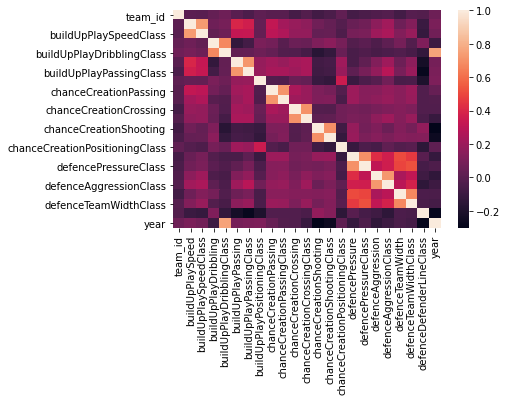

In [100]:
sns.heatmap(team_attributes.corr())

In [157]:
print(team_attributes[team_attributes["buildUpPlaySpeedClass"]==0].buildUpPlaySpeed.min(), 
      team_attributes[team_attributes["buildUpPlaySpeedClass"]==0].buildUpPlaySpeed.max())
print(team_attributes[team_attributes["buildUpPlaySpeedClass"]==1].buildUpPlaySpeed.min(), 
      team_attributes[team_attributes["buildUpPlaySpeedClass"]==1].buildUpPlaySpeed.max())
print(team_attributes[team_attributes["buildUpPlaySpeedClass"]==2].buildUpPlaySpeed.min(), 
      team_attributes[team_attributes["buildUpPlaySpeedClass"]==2].buildUpPlaySpeed.max())

print(team_attributes[team_attributes["buildUpPlayDribblingClass"]==0].buildUpPlayDribbling.min(), 
      team_attributes[team_attributes["buildUpPlayDribblingClass"]==0].buildUpPlayDribbling.max())
print(team_attributes[team_attributes["buildUpPlayDribblingClass"]==1].buildUpPlayDribbling.min(), 
      team_attributes[team_attributes["buildUpPlayDribblingClass"]==1].buildUpPlayDribbling.max())
print(team_attributes[team_attributes["buildUpPlayDribblingClass"]==2].buildUpPlayDribbling.min(), 
      team_attributes[team_attributes["buildUpPlayDribblingClass"]==2].buildUpPlayDribbling.max())

print(team_attributes[team_attributes["buildUpPlayPassingClass"]==0].buildUpPlayPassing.min(), 
      team_attributes[team_attributes["buildUpPlayPassingClass"]==0].buildUpPlayPassing.max())
print(team_attributes[team_attributes["buildUpPlayPassingClass"]==1].buildUpPlayPassing.min(), 
      team_attributes[team_attributes["buildUpPlayPassingClass"]==1].buildUpPlayPassing.max())
print(team_attributes[team_attributes["buildUpPlayPassingClass"]==2].buildUpPlayPassing.min(), 
      team_attributes[team_attributes["buildUpPlayPassingClass"]==2].buildUpPlayPassing.max())

print(team_attributes[team_attributes["chanceCreationPassingClass"]==0].chanceCreationPassing.min(), 
      team_attributes[team_attributes["chanceCreationPassingClass"]==0].chanceCreationPassing.max())
print(team_attributes[team_attributes["chanceCreationPassingClass"]==1].chanceCreationPassing.min(), 
      team_attributes[team_attributes["chanceCreationPassingClass"]==1].chanceCreationPassing.max())
print(team_attributes[team_attributes["chanceCreationPassingClass"]==2].chanceCreationPassing.min(), 
      team_attributes[team_attributes["chanceCreationPassingClass"]==2].chanceCreationPassing.max())

print(team_attributes[team_attributes["chanceCreationCrossingClass"]==0].chanceCreationCrossing.min(), 
      team_attributes[team_attributes["chanceCreationCrossingClass"]==0].chanceCreationCrossing.max())
print(team_attributes[team_attributes["chanceCreationCrossingClass"]==1].chanceCreationCrossing.min(), 
      team_attributes[team_attributes["chanceCreationCrossingClass"]==1].chanceCreationCrossing.max())
print(team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationCrossing.min(), 
      team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationCrossing.max())

print(team_attributes[team_attributes["chanceCreationShootingClass"]==0].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationShootingClass"]==0].chanceCreationShooting.max())
print(team_attributes[team_attributes["chanceCreationShootingClass"]==1].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationShootingClass"]==1].chanceCreationShooting.max())
print(team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationShooting.max())

print(team_attributes[team_attributes["chanceCreationShootingClass"]==0].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationShootingClass"]==0].chanceCreationShooting.max())
print(team_attributes[team_attributes["chanceCreationShootingClass"]==1].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationShootingClass"]==1].chanceCreationShooting.max())
print(team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationShooting.min(), 
      team_attributes[team_attributes["chanceCreationCrossingClass"]==2].chanceCreationShooting.max())

print(team_attributes[team_attributes["defenceAggressionClass"]==0].defenceAggression.min(), 
      team_attributes[team_attributes["defenceAggressionClass"]==0].defenceAggression.max())
print(team_attributes[team_attributes["defenceAggressionClass"]==1].defenceAggression.min(), 
      team_attributes[team_attributes["defenceAggressionClass"]==1].defenceAggression.max())
print(team_attributes[team_attributes["defenceAggressionClass"]==2].defenceAggression.min(), 
      team_attributes[team_attributes["defenceAggressionClass"]==2].defenceAggression.max())

print(team_attributes[team_attributes["defenceTeamWidthClass"]==0].defenceTeamWidth.min(), 
      team_attributes[team_attributes["defenceTeamWidthClass"]==0].defenceTeamWidth.max())
print(team_attributes[team_attributes["defenceTeamWidthClass"]==1].defenceTeamWidth.min(), 
      team_attributes[team_attributes["defenceTeamWidthClass"]==1].defenceTeamWidth.max())
print(team_attributes[team_attributes["defenceTeamWidthClass"]==2].defenceTeamWidth.min(), 
      team_attributes[team_attributes["defenceTeamWidthClass"]==2].defenceTeamWidth.max())

print(team_attributes[team_attributes["defencePressureClass"]==0].defencePressure.min(), 
      team_attributes[team_attributes["defencePressureClass"]==0].defencePressure.max())
print(team_attributes[team_attributes["defencePressureClass"]==1].defencePressure.min(), 
      team_attributes[team_attributes["defencePressureClass"]==1].defencePressure.max())
print(team_attributes[team_attributes["defencePressureClass"]==2].defencePressure.min(), 
      team_attributes[team_attributes["defencePressureClass"]==2].defencePressure.max())


20 33
34 66
67 80
24.0 33.0
34.0 66.0
67.0 77.0
20 33
34 66
67 80
21 33
34 66
67 80
20 33
34 66
67 80
22 33
34 66
29 79
22 33
34 66
29 79
24 33
34 66
67 72
29 33
34 66
67 73
23 33
34 66
67 72


# Group by team/year, rename teamid

In [83]:
team_attributes

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year
0,9930,2010-02-22,60,1,NaN,0,50,1,1,60,...,1,1,50,1,55,1,45,1,0,2010
1,9930,2014-09-19,52,1,48.0,1,56,1,1,54,...,1,1,47,1,44,1,54,1,0,2014
2,9930,2015-09-10,47,1,41.0,1,54,1,1,54,...,1,1,47,1,44,1,54,1,0,2015
3,8485,2010-02-22,70,2,NaN,0,70,2,1,70,...,2,1,60,1,70,2,70,2,0,2010
4,8485,2011-02-22,47,1,NaN,0,52,1,1,53,...,1,1,47,1,47,1,52,1,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,2011-02-22,52,1,NaN,0,52,1,1,52,...,1,1,46,1,48,1,53,1,0,2011
1454,10000,2012-02-22,54,1,NaN,0,51,1,1,47,...,1,1,44,1,55,1,53,1,0,2012
1455,10000,2013-09-20,54,1,NaN,0,51,1,1,47,...,0,1,44,1,58,1,37,1,0,2013
1456,10000,2014-09-19,54,1,42.0,1,51,1,1,47,...,0,1,44,1,58,1,37,1,0,2014


In [94]:
team_attributes.groupby(by = ["team_id","year"]).count()["date"].unique()

array([1, 2], dtype=int64)

In [98]:
df = team_attributes.groupby(by = ["team_id","year"]).count()
df[df.date==2]

,,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_id,year,,,,,,,,,,,,,,,,,,,,,
9996,2015,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


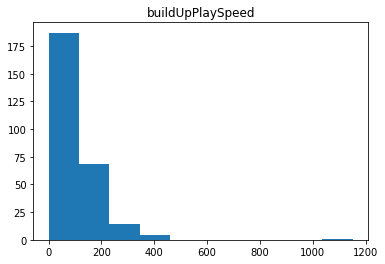

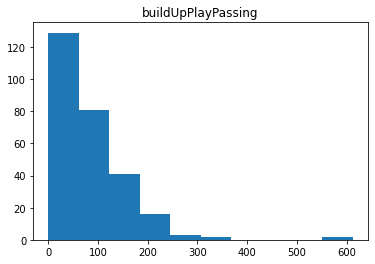

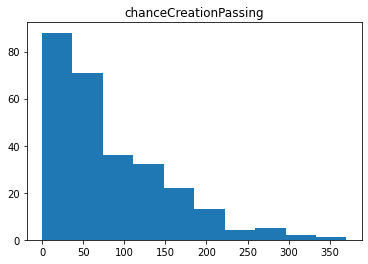

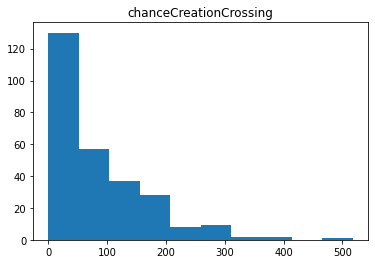

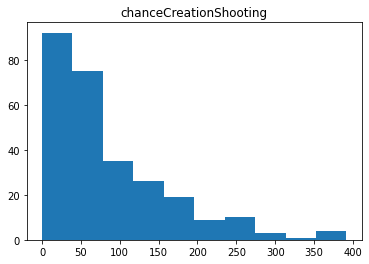

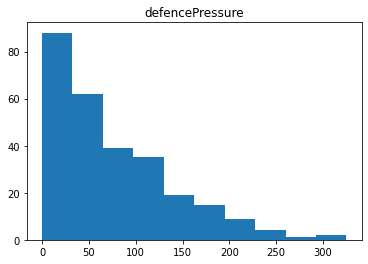

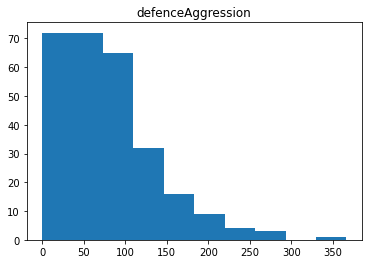

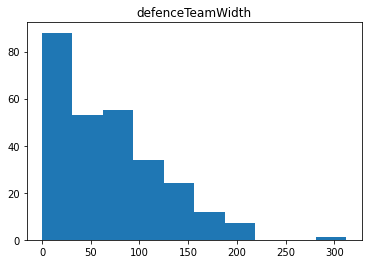

In [57]:
for i in num_col:
    plt.hist(attr_var[i])
    plt.title(i)
    plt.show()

In [58]:
team_attributes[team_attributes.team_id==208931]

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
274,208931,9/19/14 0:00,32,0,46.0,1,31,0,1,47,...,54,1,1,46,1,44,1,51,1,0
275,208931,9/10/15 0:00,80,2,45.0,1,65,1,1,70,...,50,1,1,25,0,55,1,35,1,0


In [131]:
attr_mean = team_attributes.groupby(by = ["team_id", "year"]).mean()

attr_mean["team_id_tuple"] = attr_mean.index

In [132]:
attr_mean[["team_id", "year"]] = attr_mean["team_id_tuple"].apply(pd.Series)

In [137]:
attr_mean["new_id"] = attr_mean["team_id"].map(str) + attr_mean["year"].map(str)

In [138]:
attr_mean

buildUpPlaySpeed  buildUpPlaySpeedClass  buildUpPlayDribbling  \
team_id year                                                                  
1601    2010                30                      0                   NaN   
        2011                48                      1                   NaN   
        2012                53                      1                   NaN   
        2013                53                      1                   NaN   
        2014                53                      1                  48.0   
...                        ...                    ...                   ...   
158085  2014                69                      2                  66.0   
        2015                65                      1                  66.0   
208931  2014                32                      0                  46.0   
        2015                80                      2                  45.0   
274581  2015                50                      1                  50.0   

              buildUpPlayDribblingClass  buildUpPlayPassing  \
team_id year                                                  
1601    2010                          0                  40   
        2011                          0                  51   
        2012                          0                  55   
        2013                          0                  55   
        2014                          1                  38   
...                                 ...                 ...   
158085  2014                          1                  39   
        2015                          1                  39   
208931  2014                          1                  31   
        2015                          1                  65   
274581  2015                          1                  50   

              buildUpPlayPassingClass  buildUpPlayPositioningClass  \
team_id year                                                         
1601    2010                        1                            1   
        2011                        1                            1   
        2012                        1                            1   
        2013                        1                            1   
        2014                        1                            1   
...                               ...                          ...   
158085  2014                        1                            1   
        2015                        1                            1   
208931  2014                        0                            1   
        2015                        1                            1   
274581  2015                        1                            1   

              chanceCreationPassing  chanceCreationPassingClass  \
team_id year                                                      
1601    2010                     50                           1   
        2011                     68                           2   
        2012                     44                           1   
        2013                     44                           1   
        2014                     66                           1   
...                             ...                         ...   
158085  2014                     55                           1   
        2015                     55                           1   
208931  2014                     47                           1   
        2015                     70                           2   
274581  2015                     50                           1   

              chanceCreationCrossing  ...  defencePressureClass  \
team_id year                          ...                         
1601    2010                      35  ...                     1   
        2011                      67  ...                     1   
        2012                      65  ...                     1   
        2013                      65  ...       

In [139]:
attr_mean.to_csv("team_attributes_GrpByNewTEAMID.csv")

# Try to fill null-values

In [108]:
attr_mean[attr_mean["buildUpPlayDribbling"].isnull()].buildUpPlayDribblingClass.unique()

array([0], dtype=int64)

In [110]:
attr_mean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1457 entries, (1601, 2010) to (274581, 2015)
Data columns (total 21 columns):
buildUpPlaySpeed                  1457 non-null int64
buildUpPlaySpeedClass             1457 non-null int64
buildUpPlayDribbling              488 non-null float64
buildUpPlayDribblingClass         1457 non-null int64
buildUpPlayPassing                1457 non-null int64
buildUpPlayPassingClass           1457 non-null int64
buildUpPlayPositioningClass       1457 non-null int64
chanceCreationPassing             1457 non-null int64
chanceCreationPassingClass        1457 non-null int64
chanceCreationCrossing            1457 non-null int64
chanceCreationCrossingClass       1457 non-null int64
chanceCreationShooting            1457 non-null int64
chanceCreationShootingClass       1457 non-null int64
chanceCreationPositioningClass    1457 non-null int64
defencePressure                   1457 non-null int64
defencePressureClass              1457 non-null int64
defence

I think we should probably just dump the "buildUpPlayDribbling" and "buildUpPlayDribblingClass"    ??

## Rename teamid of match file

In [147]:
match["date"] = pd.to_datetime(match["date"])
match["year"] = pd.DatetimeIndex(match['date']).year
match["month"] = pd.DatetimeIndex(match['date']).month
match["day"] = pd.DatetimeIndex(match['date']).day
match["week_num"] = match['date'].dt.week

In [148]:
match

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,year,month,day,week_num
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,1.78,3.25,4.00,1.73,3.40,4.20,2008,8,17,33
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,1.85,3.25,3.75,1.91,3.25,3.60,2008,8,16,33
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,2.50,3.20,2.50,2.30,3.20,2.75,2008,8,16,33
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,1.50,3.75,5.50,1.44,3.75,6.50,2008,8,17,33
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,4.50,3.50,1.65,4.75,3.30,1.67,2008,8,16,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,9,22,39
25975,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,9,23,39
25976,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,9,23,39
25977,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,9,22,39


In [149]:
match["home_team_id_new"] = match["home_team_id"].map(str) + match["year"].map(str)
match["away_team_id_new"] = match["away_team_id"].map(str) + match["year"].map(str)

In [150]:
match

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,...,GBA,BSH,BSD,BSA,year,month,day,week_num,home_team_id_new,away_team_id_new
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,4.00,1.73,3.40,4.20,2008,8,17,33,99872008,99932008
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,3.75,1.91,3.25,3.60,2008,8,16,33,100002008,99942008
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,2.50,2.30,3.20,2.75,2008,8,16,33,99842008,86352008
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,5.50,1.44,3.75,6.50,2008,8,17,33,99912008,99982008
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,1.65,4.75,3.30,1.67,2008,8,16,33,79472008,99852008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0,...,NaN,NaN,NaN,NaN,2015,9,22,39,101902015,101912015
25975,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2,...,NaN,NaN,NaN,NaN,2015,9,23,39,98242015,101992015
25976,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0,...,NaN,NaN,NaN,NaN,2015,9,23,39,99562015,101792015
25977,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0,...,NaN,NaN,NaN,NaN,2015,9,22,39,78962015,102432015


In [151]:
match.to_csv("match_newTeamID.csv")